In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter
import glob
import json
import matplotlib.pyplot as plt
import plotly.express as px
import tweets_utils
import importlib
from collections import Counter
%autosave 3600

Autosaving every 3600 seconds


# Indice
- [Utils](#utils)
- [Collecting data](#collecting)
- [Stats](#stats)
- [Process domain](#domain)
- [Classify credibility](#credibility)

### Utils
<a id="utils" />

In [2]:
path = "C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/"
bots = pd.read_csv(path + "bot_score.csv")
bots

,id,user
0,1252818873578975232,matomecorona
1,1239490346691760128,Host24Space
2,1238684966063501313,CoronaVirusNFO
3,1203462567861084160,naija_reports
4,1245483551749005312,FR24NewsFrance
...,...,...
3146,2937491779,MARIASILVIAARM2
3147,2459302512,mickivoss
3148,1088122630471847937,Diana_Chumley
3149,1021753060585078789,hushnowlilbaby


In [3]:
credibility_url = pd.read_csv("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/domain_credibility.csv")
credibility_url

,Domain,Class
0,100percentfedup.com,low
1,100percentfedup.com,high
2,10news.one,low
3,12minutos.com,low
4,12news.com,high
...,...,...
820,childrenshealthdefense.org,low
821,AdvancedMedicineConference.com,low
822,aol.com,high
823,trendingpolitics.com,low


### Collecting data
<a id="collecting"/>

In [11]:
cols_tweets = [u'user_screen_name', u'created_at', u'lang',
               u'rt_user_screen_name', u'rt_created_at', u'in_reply_to_status_id',
               u'hashtags', u'urls', u'rt_lang']
df_user = pd.DataFrame()

# cols_tweets = [u'user_screen_name',u'user_id', u'created_at', 
#                u'urls', u"rt_created_at", u"rt_user_id", 
#                u"rt_user_screen_name", u'in_reply_to_user_id', 
#                u'in_reply_to_screen_name', u'in_reply_to_status_id']

files_tweets = glob.glob("F:/COVID-19-Tweets/*/tweets.csv")

In [12]:
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_tweets, True, bots["user"]))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        df_user = df_user.append(lista[i]["df"])
        df_user = df_user.append(lista[i]["df_rt"])


stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Reading file: F:/COVID-19-Tweets\2020-01\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Mese numero 1
Reading file: F:/COVID-19-Tweets\2020-02\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Mese numero 2
Reading file: F:/COVID-19-Tweets\2020-03\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Processing chunk 13
Processing chunk 14
Processing chunk 15
Mese numero 3
Reading file: F:/COVID-19-Tweets\2020-04\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7


In [14]:
df_user = df_user.reset_index(drop=True)
df_user

,created_at,user_screen_name,lang,in_reply_to_status_id,rt_created_at,rt_lang,rt_user_screen_name,hashtags,urls
0,Tue Jan 21 22:56:08 +0000 2020,Norberta36,en,NaN,Tue Jan 21 18:15:11 +0000 2020,en,MatthewHilk,[],[]
1,Tue Jan 21 23:24:17 +0000 2020,Pissed_Woman,en,NaN,Tue Jan 21 18:15:11 +0000 2020,en,MatthewHilk,[],[]
2,Wed Jan 22 01:00:14 +0000 2020,FortuneMagazine,en,NaN,NaN,NaN,NaN,[],"[{'url': 'https://t.co/2FVgxuZqSw', 'expanded_..."
3,Wed Jan 22 04:47:03 +0000 2020,VirginiaLoughn1,en,NaN,Wed Jan 22 02:39:28 +0000 2020,en,MichaelWRader,"[{'text': 'coronavirus', 'indices': [64, 76]}]",[]
4,Wed Jan 22 04:46:13 +0000 2020,VirginiaLoughn1,en,NaN,Tue Jan 21 22:52:32 +0000 2020,en,EthanObama,[],[]
...,...,...,...,...,...,...,...,...,...
1452601,Thu May 21 20:55:02 +0000 2020,Nohranran,ja,NaN,Thu May 21 20:50:01 +0000 2020,ja,ReutersJapan,[],"[{'url': 'https://t.co/maP4wEOHZ6', 'expanded_..."
1452602,Sun May 17 20:08:36 +0000 2020,explicamelotu,es,NaN,Sun May 17 16:55:00 +0000 2020,es,eldiarioes,[],[]
1452603,Fri May 29 03:24:24 +0000 2020,libertadsosnic,es,NaN,Thu May 28 18:55:23 +0000 2020,es,canal12nica,"[{'text': 'UltimaHora', 'indices': [17, 28]}, ...",[]
1452604,Sat May 30 04:23:16 +0000 2020,farukgu14964428,tr,NaN,Fri May 29 20:59:24 +0000 2020,tr,drfahrettinkoca,[],[]


In [17]:
original = df_user[df_user['rt_created_at'].isna() & df_user['in_reply_to_status_id'].isna()]
retweet = df_user[df_user['rt_created_at'].notna()]
reply = df_user[df_user['in_reply_to_status_id'].notna()]

In [19]:
d_total_len = len(df_user)
d_original_len = len(original)
d_retweet_len = len(retweet)
d_reply_len = len(reply)

In [83]:
date = []
for i in data:
    date.append(tweets_utils.process_datetime(i))

In [87]:
to_pop = []
for i in range(len(date)):
    if("2018" in date[i]):
        print(i)
        to_pop.append(i)
to_pop
for i in to_pop:
    date.pop(i)


In [88]:
df = pd.DataFrame(date, columns=['date'])
days_count = df['date'].value_counts()

In [91]:
fig = px.histogram(df, x="date")
fig.update_layout(
    title_text='Daily tweets', # title of plot
    xaxis_title_text='Tweet', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.1, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show()


In [90]:
len(date)

97361

### Stats
<a id="stats"/>

In [6]:
tweets_utils.stats(total_len, original_len, retweet_len, reply_len)

Number of total tweets: 66412411
Number of original tweets: 13999715
Number of retweet: 48312504
Number of reply: 4100192
Number of original_tweets: 21.08% of total tweets
Number of retweets: 72.75% of total tweets
Number of replies: 6.17% of total tweets
Check sum == len(tweets):  True


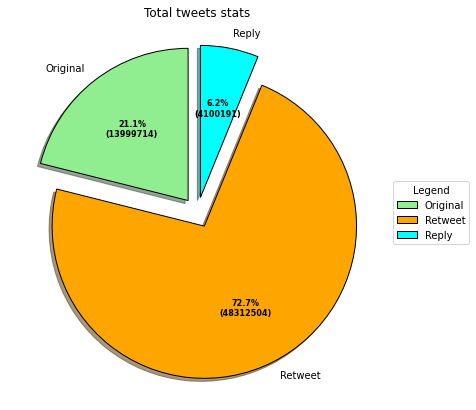

In [7]:
tweets_utils.print_pie_chart3("Total tweets stats","Original","Retweet", "Reply", original_len, retweet_len, reply_len)

In [20]:
tweets_utils.stats(d_total_len, d_original_len, d_retweet_len, d_reply_len)

Number of total tweets: 1452606
Number of original tweets: 290015
Number of retweet: 1145272
Number of reply: 17319
Number of original_tweets: 19.97% of total tweets
Number of retweets: 78.84% of total tweets
Number of replies: 1.19% of total tweets
Check sum == len(tweets):  True


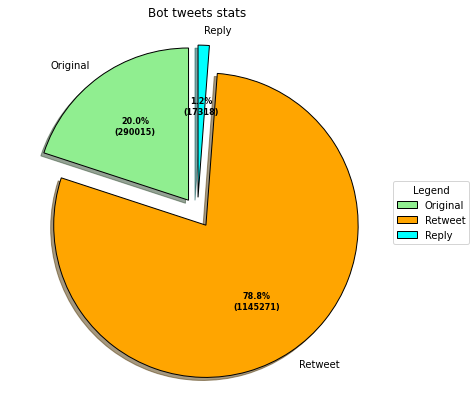

In [21]:
tweets_utils.print_pie_chart3("Bot tweets stats","Original","Retweet", "Reply", d_original_len, d_retweet_len, d_reply_len)

### Process domain
<a id="domain"/>

In [16]:
df_user.to_csv("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/bots_study.csv", index=False)

In [34]:
# def remove_www(url_list):
#     urls_rt_beauty = []
#     for i in url_list:
#         value = i
#         if "www" in i:
#             splitted = i.split(".")
#             if(len(splitted) > 2):
#                 value = splitted[1] + "." + splitted[2]
#             else:
#                 value = splitted[1]
#         urls_rt_beauty.append(value)
#     return urls_rt_beauty

In [2]:
urls = [tweets_utils.url_decompress(v) if v != "[]" else "0" for v in link]
urls = list(filter(lambda num: num != "0", urls))
urls = tweets_utils.remove_www(urls)
# urls

In [97]:
list_credibility = []
start_time = time.perf_counter()
for i in urls:
    if(i in credibility_url["Domain"].unique()):
        class_domain = credibility_url.loc[credibility_url["Domain"] == i, "Class"]
        list_credibility.append((i,class_domain.values[0]))
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  94.36749400000008


### Classify credibility
<a id="credibility"/>

In [1]:
list_credibility

In [101]:
type(list_credibility)

list

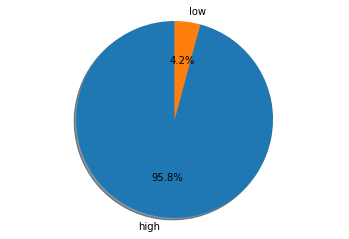

In [105]:
class_domain = []
for i in range(len(list_credibility)):
    class_domain.append(list_credibility[i][1])
class_domain = pd.Series(class_domain).value_counts().sort_values()
labels = ["high", "low"]
values = [class_domain.high, class_domain.low]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()